# Sales Analysis

Import Necessary Libraries

In [8]:
import pandas as pd
import os

#### Task #1:Merging the 12 months of sales data in to a single CSV file

In [15]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files=[file for file in os.listdir('./Sales_data')]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv",index=False)

#### Read in updated dataframe

In [17]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Drop  rows of NAN

In [21]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Find 'or' and delete

In [27]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Convert columns to correct type

In [30]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])# make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])# make float

### Augmented data with additional columns

### Task 2: Add months column

In [26]:
all_data['months']=all_data['Order Date'].str[0:2]
all_data['months']=all_data['months'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task3: Add a sales column

In [40]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Quantity ordered,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99


#### Task 4: add a city column

In [48]:
#lets use .apply()
def get_city(addres):
    return addres.split(',')[1]
def get_state(addres):
    return addres.split(',')[2].split(' ')[1]
all_data['city']=all_data['Purchase Address'].apply(lambda x:f"{get_city(x)}({get_state(x)})")
#all_data=all_data.drop(columns='Column')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Quantity ordered,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles(CA)


#### Question 1: What was the best months for sales? How much earned that month?

In [35]:
results=all_data.groupby('months').sum()
results

,Quantity Ordered,Price Each,Quantity ordered,sales
months,,,,
1,10903,1.811768e+06,10903,1.822257e+06
2,13449,2.188885e+06,13449,2.202022e+06
3,17005,2.791208e+06,17005,2.807100e+06
4,20558,3.367671e+06,20558,3.390670e+06
5,18667,3.135125e+06,18667,3.152607e+06
6,15253,2.562026e+06,15253,2.577802e+06
7,16072,2.632540e+06,16072,2.647776e+06
8,13448,2.230345e+06,13448,2.244468e+06
9,13109,2.084992e+06,13109,2.097560e+06


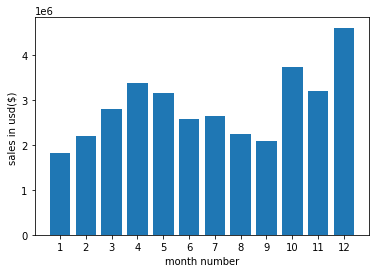

In [39]:
import matplotlib.pyplot as plt
months= range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel('sales in usd($) ')
plt.xlabel('month number')
plt.show()

#### Question 2: what the city had  the highest number of sales

In [51]:
results=all_data.groupby('city').sum()
results

,Quantity Ordered,Price Each,months,Quantity ordered,sales
city,,,,,
Atlanta(GA),16602,2.779908e+06,104794,16602,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,11153,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,22528,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,16730,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,33289,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,27932,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,2750,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,11303,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,50239,8.262204e+06


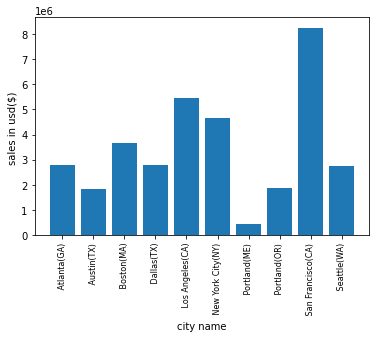

In [55]:
cities=[city for city, df in all_data.groupby('city')]
plt.bar(cities,results['sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('sales in usd($) ')
plt.xlabel('city name')
plt.show()

#### what time should we display advertisement to maxmize likelihood of customers buying product?

In [59]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [60]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Quantity ordered,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles(CA)


In [63]:
all_data['hours']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Quantity ordered,sales,city,hours,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles(CA),9,27


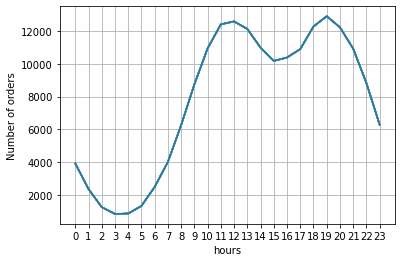

In [70]:
hours=[hour for hour, df in all_data.groupby('hours')]
plt.plot(hours,all_data.groupby(['hours']).count())
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

#### Question4: What products are most often sold together?

In [77]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

<ipython-input-77-71c2c42dbb86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [79]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: what product sold the most? why do you think it sold the most?

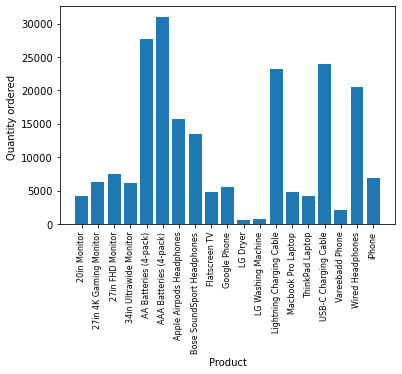

In [85]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
products=[product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.ylabel('Quantity ordered ')
plt.xlabel('Product')
plt.show()



<ipython-input-88-dacb484a0cd6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


<function matplotlib.pyplot.show(close=None, block=None)>

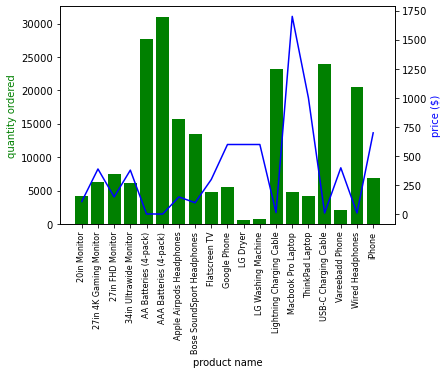

In [88]:
prices=all_data.groupby('Product').mean()['Price Each']
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('product name')
ax1.set_ylabel('quantity ordered',color='g')
ax2.set_ylabel('price ($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show
